In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from torchdiffeq import odeint

from pideq.four_tanks import four_tanks

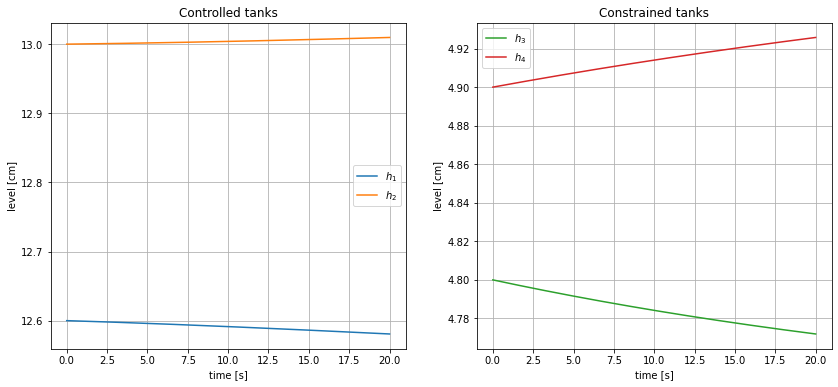

In [4]:
K = 200
dt = .1
time = [dt * k for k in range(K+1)]

def get_ft(y0=torch.Tensor([12.6, 13.0, 4.8, 4.9])):
    y0_ = y0.unsqueeze(0)

    u = torch.Tensor([3.15, 3.15]).unsqueeze(0)

    y = odeint(lambda t, y: four_tanks(y,u), y0_, torch.Tensor(time), method='rk4')
    y = y.squeeze(1)

    return y

def plot_ft(y):
    y_ = y.detach().numpy()

    fig, axs = plt.subplots(1,2)
    fig.set_size_inches(14,6)

    axs[0].set_title('Controlled tanks')
    axs[0].plot(time, y_[:,0], c='tab:blue', label='$h_1$')
    axs[0].plot(time, y_[:,1], c='tab:orange', label='$h_2$')
    axs[0].set_ylabel('level [cm]')
    axs[0].set_xlabel('time [s]')
    axs[0].legend()
    axs[0].grid()

    axs[1].set_title('Constrained tanks')
    axs[1].plot(time, y_[:,2], c='tab:green', label='$h_3$')
    axs[1].plot(time, y_[:,3], c='tab:red', label='$h_4$')
    axs[1].set_ylabel('level [cm]')
    axs[1].set_xlabel('time [s]')
    axs[1].legend()
    axs[1].grid()

    plt.show()

y = get_ft()
plot_ft(y)

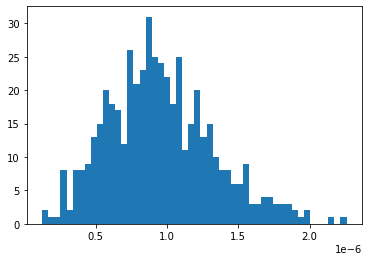

In [6]:
norms = list()
for _ in range(500):
    norms.append((1e-6 * torch.randn(1,4) / 2).norm().item())

plt.hist(norms, bins=50)
plt.show()

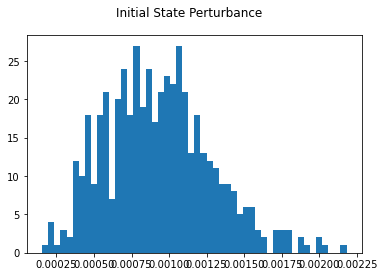

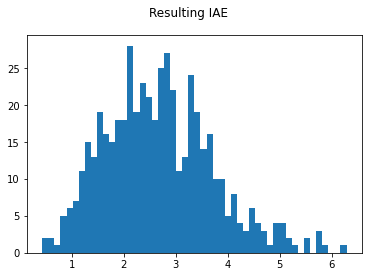

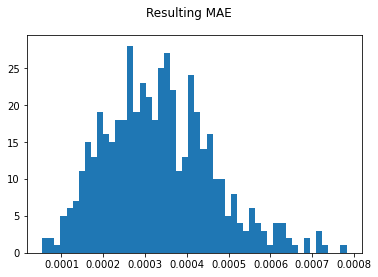

In [9]:
# y0 = torch.Tensor([12.6, 13.0, 4.8, 4.9])

# iaes = list()
# maes = list()
# norms = list()
# for _ in range(500):
#     eps = np.sqrt(1e-6) * torch.randn(4) / 2

#     norms.append(eps.norm().item())

#     y_eps = get_ft(y0 + eps)

#     iae = (y - y_eps).abs().sum() / dt
#     mae = (y - y_eps).abs().mean()
#     iaes.append(iae.item())
#     maes.append(mae.item())

plt.hist(norms, bins=50)
plt.suptitle('Initial State Perturbance')
plt.show()

plt.hist(iaes, bins=50)
plt.suptitle('Resulting IAE')
plt.show()

plt.hist(maes, bins=50)
plt.suptitle('Resulting MAE')
plt.show()